In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


The special thing about time series data is that data points relate to one another they are dependent

In [2]:
ts = pd.Series(np.random.randn(20), pd.date_range('4/12/2018', freq='H', periods=20))
ts_lagged = ts.shift(5) # Move by 5 hour

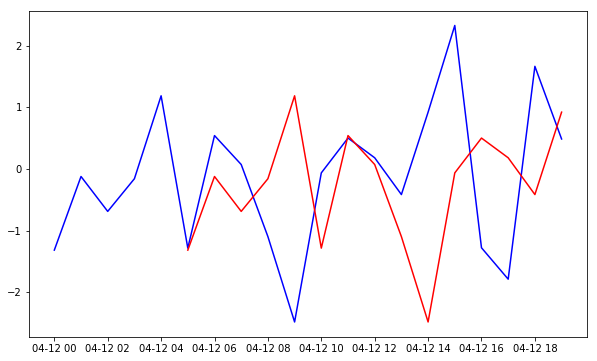

In [3]:
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='r')

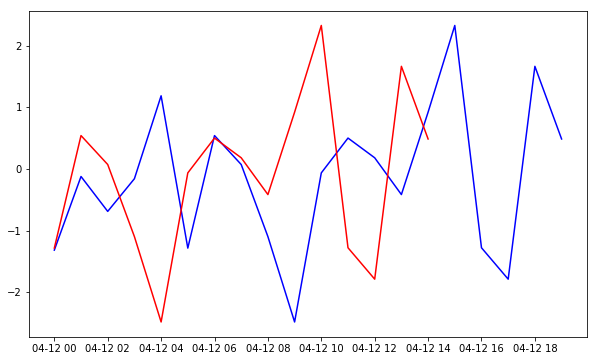

In [4]:
ts_lagged = ts.shift(-5) # Move by 5 hour backward
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='r')

Window function are like aggregate functions we can use them in conjuction with resample

In [5]:
df = pd.DataFrame(np.random.randn(600, 3), index=pd.date_range('4/12/2017', periods=600, freq='D'), columns=list('ABC'))
df.head()

,A,B,C
2017-04-12,-1.964584,0.373083,-0.864011
2017-04-13,1.332762,-0.245816,-0.270491
2017-04-14,-0.855919,1.181549,0.814347
2017-04-15,0.433414,-0.995678,-0.706444
2017-04-16,-1.182780,0.904404,-1.259573


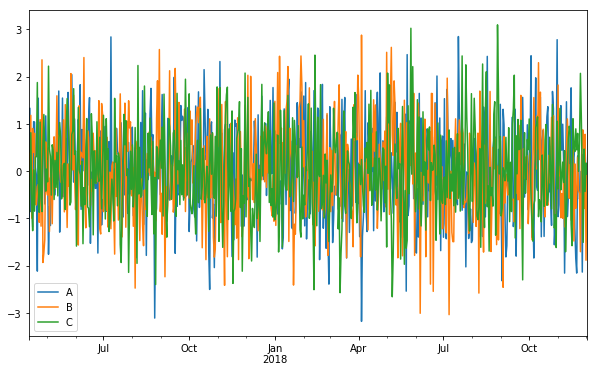

In [6]:
df.plot()

In [7]:
r = df.rolling(window=20)
r

Rolling [window=20,center=False,axis=0]

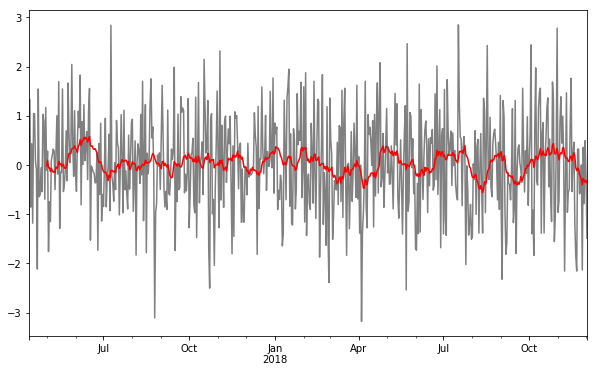

In [8]:
df['A'].plot(color='gray')
r.mean()['A'].plot(color='red')

Here are some rolling options <br />
r.agg, r.apply, r.count, r.mean, r.min, r.max, r.name, r.quantile, r.std, r.var, r.sum, r.kurt, r.skew

In [9]:
r.agg(['sum', 'var'])
r['A'].agg(['sum', 'var'])

,sum,var
2017-04-12,NaN,NaN
2017-04-13,NaN,NaN
2017-04-14,NaN,NaN
2017-04-15,NaN,NaN
2017-04-16,NaN,NaN
2017-04-17,NaN,NaN
2017-04-18,NaN,NaN
2017-04-19,NaN,NaN
2017-04-20,NaN,NaN
2017-04-21,NaN,NaN


Custom rolluing functions

In [10]:
df.rolling(window=10, center=False).apply(lambda x: x[0]/x[1])[0:10]

,A,B,C
2017-04-12,NaN,NaN,NaN
2017-04-13,NaN,NaN,NaN
2017-04-14,NaN,NaN,NaN
2017-04-15,NaN,NaN,NaN
2017-04-16,NaN,NaN,NaN
2017-04-17,NaN,NaN,NaN
2017-04-18,NaN,NaN,NaN
2017-04-19,NaN,NaN,NaN
2017-04-20,NaN,NaN,NaN
2017-04-21,-1.474069,-1.517733,3.194229


In [11]:
df.rolling(window=10, center=False).apply(lambda x: x.max()-x.min()) # Max value in a window minus lowest value in a window

,A,B,C
2017-04-12,NaN,NaN,NaN
2017-04-13,NaN,NaN,NaN
2017-04-14,NaN,NaN,NaN
2017-04-15,NaN,NaN,NaN
2017-04-16,NaN,NaN,NaN
2017-04-17,NaN,NaN,NaN
2017-04-18,NaN,NaN,NaN
2017-04-19,NaN,NaN,NaN
2017-04-20,NaN,NaN,NaN
2017-04-21,3.448819,2.177227,3.136258


In [14]:
df.rolling(window=10, center=False).apply(lambda x: x[0]-x[-1])

,A,B,C
2017-04-12,NaN,NaN,NaN
2017-04-13,NaN,NaN,NaN
2017-04-14,NaN,NaN,NaN
2017-04-15,NaN,NaN,NaN
2017-04-16,NaN,NaN,NaN
2017-04-17,NaN,NaN,NaN
2017-04-18,NaN,NaN,NaN
2017-04-19,NaN,NaN,NaN
2017-04-20,NaN,NaN,NaN
2017-04-21,0.151473,0.696411,-2.740696


Generate rolling window function of monthly data from daily data

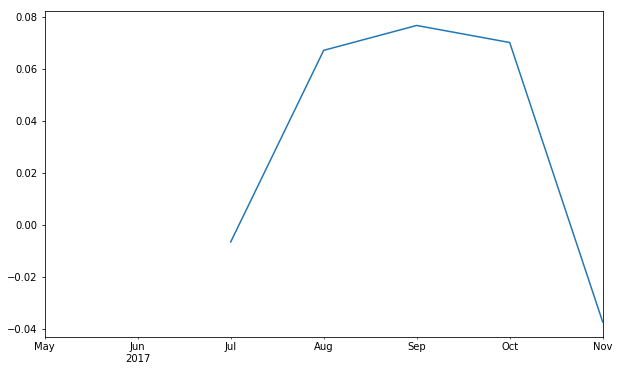

In [19]:
ts_long = pd.Series(np.random.randn(200), pd.date_range('5/1/2017', freq='D', periods=200))
ts_long.resample('M').mean().rolling(window=3).mean().plot()
# Resample daily data to month by applying mean and then taking mean of those month of window=3

# Expanding window

In [20]:
df.expanding(min_periods=1).mean()[1:10]

,A,B,C
2017-04-13,-0.315911,0.063633,-0.567251
2017-04-14,-0.495913,0.436272,-0.106718
2017-04-15,-0.263581,0.078284,-0.256650
2017-04-16,-0.447421,0.243508,-0.457234
2017-04-17,-0.198201,0.268996,-0.376594
2017-04-18,-0.021459,0.345181,-0.443739
2017-04-19,-0.008634,0.214406,-0.350840
2017-04-20,-0.017770,0.110946,-0.277827
2017-04-21,-0.227599,0.067518,-0.062375


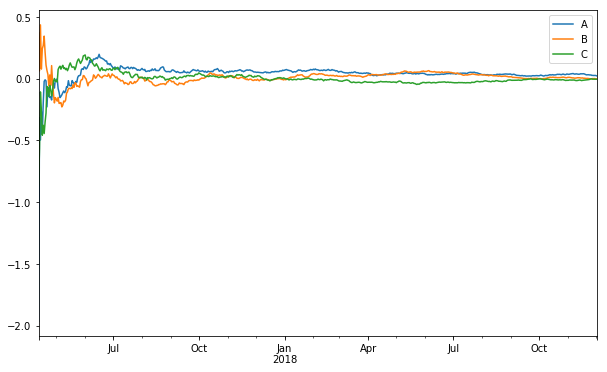

In [21]:
df.expanding(min_periods=1).mean().plot()

Exponentially weighted moving average
<br />
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html

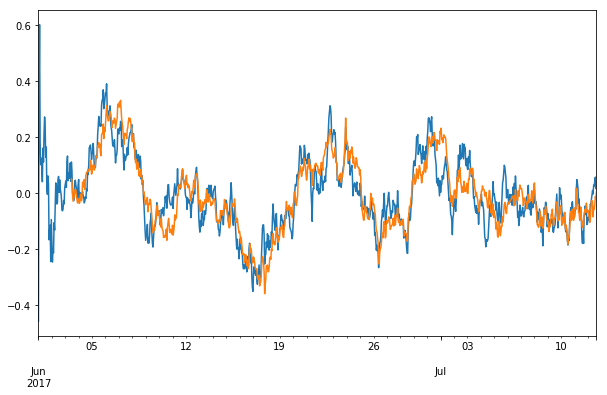

In [26]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range(start='6/1/2017', periods=1000, freq='H'))
ts.ewm(span=60, freq='H', min_periods=0, adjust=True).mean().plot()
ts.rolling(window=60).mean().plot()

When to use expanding vs rolling window?
<br />
**Expanding**: If you are adding new members but your old ones are still relevant and active
<br />

Custom function to replace .quantile(.5) function for a rolling window

In [27]:
r = df.rolling(window=20)
r.apply(lambda x: sorted(x)[round(len(x)*0.5)])

,A,B,C
2017-04-12,NaN,NaN,NaN
2017-04-13,NaN,NaN,NaN
2017-04-14,NaN,NaN,NaN
2017-04-15,NaN,NaN,NaN
2017-04-16,NaN,NaN,NaN
2017-04-17,NaN,NaN,NaN
2017-04-18,NaN,NaN,NaN
2017-04-19,NaN,NaN,NaN
2017-04-20,NaN,NaN,NaN
2017-04-21,NaN,NaN,NaN
